In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import norm, skew

In [86]:
df_train=pd.read_csv('Train.csv')
df_test=pd.read_csv('Test.csv')

In [87]:
df_train.shape, df_test.shape

((8523, 12), (5681, 11))

In [88]:
df = pd.concat([df_train, df_test]).reset_index()

In [89]:
df.head()

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [90]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat',
                                                         'LF': 'Low Fat',
                                                         'reg': 'Regular'})

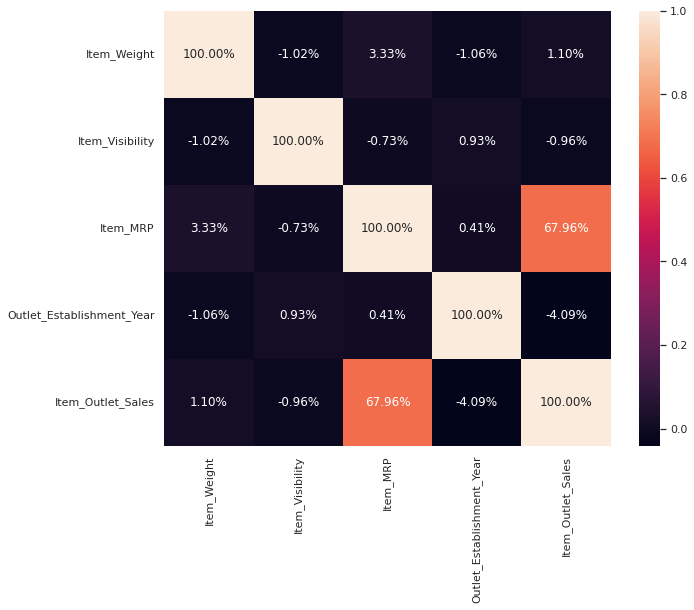

In [91]:
corrs=df_train.dropna().corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrs,annot=True,fmt='.2%')
plt.show()

In [92]:
df.drop(columns=["Outlet_Size", "Item_Weight"], inplace=True)

In [93]:
df['Item_Fat_Content'].replace({'Low Fat':1,
                                'Regular':0},
                                inplace=True)

In [94]:
df_dummies_type = pd.get_dummies(df['Item_Type'])
df = df.merge(df_dummies_type, left_index=True, right_index=True)

In [95]:
df.drop(columns=['Item_Type'],inplace=True)

In [96]:
df['Outlet_Location_Type'].replace({'Tier 1': 1,
                                      'Tier 2': 2,
                                      'Tier 3': 3},
                                      inplace=True
)

In [97]:
df_dummies_outlet = pd.get_dummies(df['Outlet_Type'])
df = df.merge(df_dummies_outlet, left_index=True, right_index=True)

In [98]:
df.drop(columns=['Outlet_Type'],inplace=True)

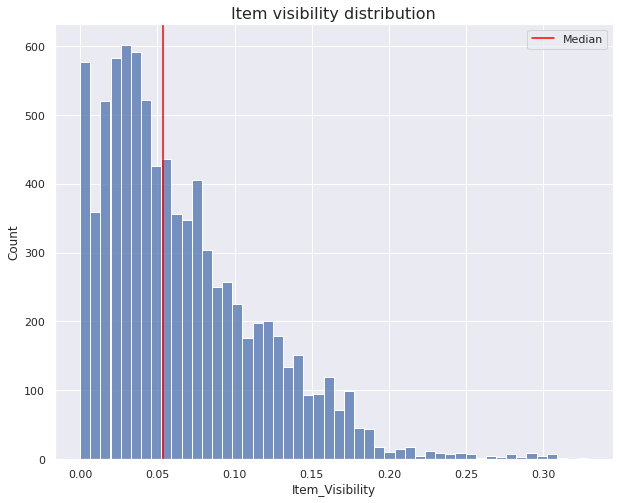

In [99]:
plt.figure(figsize=(10,8))
sns.histplot(df_train['Item_Visibility'])
plt.title('Item visibility distribution', size=16)
plt.axvline(df_train['Item_Visibility'].median(),color='red',label='Median')
plt.legend()
plt.show()

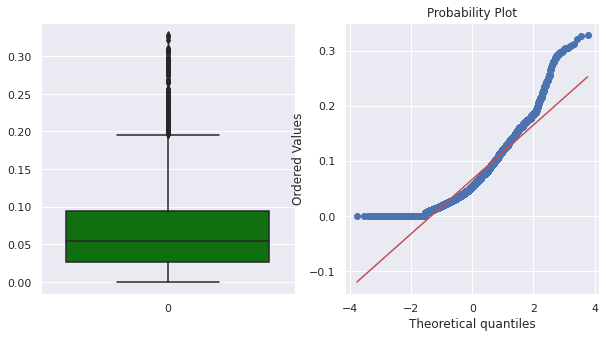

In [100]:
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(data=df_train['Item_Visibility'],ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(df_train['Item_Visibility'],plot=ax2)
plt.show()

--------

In [101]:
df_train = df.iloc[:8523].reset_index().iloc[:, 2:]
df_test = df.iloc[8523:].reset_index().iloc[:, 2:]

In [102]:
df_train.tail()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Baking Goods,Breads,...,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
8518,FDF22,1,0.056783,214.5218,OUT013,1987,3,2778.3834,0,0,...,0,0,0,1,0,0,0,1,0,0
8519,FDS36,0,0.046982,108.1570,OUT045,2002,2,549.2850,1,0,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,1,0.035186,85.1224,OUT035,2004,2,1193.1136,0,0,...,0,0,0,0,0,0,0,1,0,0
8521,FDN46,0,0.145221,103.1332,OUT018,2009,3,1845.5976,0,0,...,0,0,0,1,0,0,0,0,1,0
8522,DRG01,1,0.044878,75.4670,OUT046,1997,1,765.6700,0,0,...,0,0,0,0,1,0,0,1,0,0


In [103]:
mask = df_train['Item_Visibility']>0.2
df_train = df_train[~mask]

In [104]:
mask = df_test['Item_Visibility']>0.2
df_test = df_test[~mask]

In [105]:
df_identifiers = pd.DataFrame(df_test['Item_Identifier'])
df_identifiers['Outlet_Identifier'] = df_test['Outlet_Identifier']

In [106]:
targets = df_train['Item_Outlet_Sales']
df_train = df_train.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])
df_test = df_test.drop(columns=['Item_Identifier', 'Outlet_Identifier'])

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df_train, targets, 
                                                    shuffle=True, 
                                                    test_size=0.2, 
                                                    random_state=0
)

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [126]:
rfr = RandomForestRegressor(random_state=0)
param_grid = {'n_estimators':[3,4,5,7,9,10,12], 'max_depth':[5,7,9,10,12]}
grid = GridSearchCV(rfr,param_grid,scoring='r2',cv=10)

In [127]:
grid_result = grid.fit(X_train,y_train)
grid_result.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [208]:
grid_result.score(X_train,y_train)

0.6037626015518893

In [129]:
y_preds_rfr=grid_result.predict(X_test)
rmse_rfr=np.sqrt(mean_squared_error(y_preds_rfr,y_test))
print('RMSE for Random Forest Regression:{0:.2f}'.format(rmse_rfr))

RMSE for Random Forest Regression:1077.74


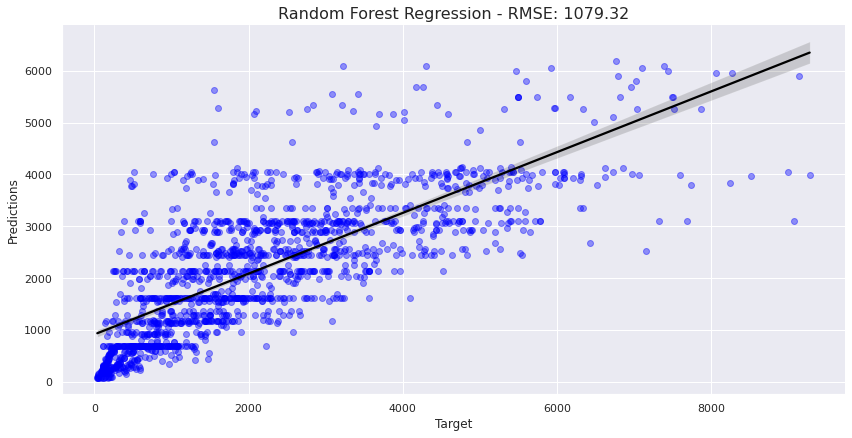

In [78]:
rfr_df=pd.DataFrame()
rfr_df['Target']=y_test
rfr_df['Predictions']=y_preds_rfr

sns.lmplot(x='Target',y='Predictions',data=rfr_df,height=6,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4,'color':'blue'})
plt.title('Random Forest Regression - RMSE: {0:.2f}'.format(rmse_rfr),size=16)
plt.show()

In [ ]:
df_test.drop(columns="Item_Outlet_Sales", inplace=True)

In [ ]:
y_preds_rfr = grid_result.predict(df_test)
df_identifiers['Item_Outlet_Sales'] = y_preds_rfr
df_identifiers.head()

In [133]:
import xgboost as xgb

In [144]:
xgb.set_config(verbosity=1)

* colsample_bytree=0.4603,
* gamma=0.0468,
* learning_rate=0.05,
* max_depth=3,
* min_child_weight=1.7817, 
* n_estimators=2200,
* reg_alpha=0.4640, 
* reg_lambda=0.8571,
* subsample=0.5213,
* random_state =123, 
* nthread = -1

0.5124207896741311
RMSE for XGBoost Regression: 1162.48
----------------
Anterior resultado 
 
 0.504743608506405 
 1171.5926264061923 



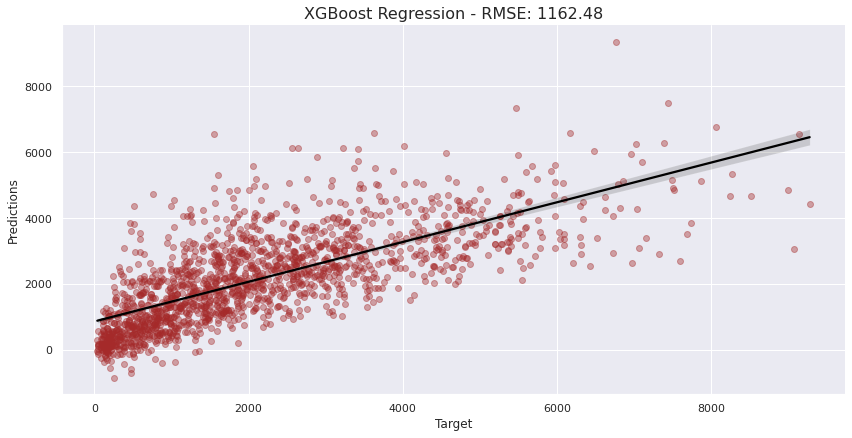

In [238]:
params = {'colsample_bytree': .4603,
          'gamma': .0468,
          'learning_rate': .6,
          'tree_method': "approx",
          'n_estimators': 80,
          'reg_lambda': 0.95,
          'nthread' : -1,
          #'min_child_weight' : 0.07817
}

xgb_reg = xgb.XGBRegressor(**params)
xgb_reg.fit(X_train,y_train)

_score = xgb_reg.score(X_test,y_test)
print(_score)
y_preds_xgb = xgb_reg.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_preds_xgb,y_test))
print('RMSE for XGBoost Regression: {0:.2f}'.format(rmse_xgb))
print("----------------")
print(f"Anterior resultado \n \n {_ant_score} \n {_ant_rmse} \n")
_ant_score = _score
_ant_rmse = rmse_xgb

ada_df=pd.DataFrame()
ada_df['Target']=y_test
ada_df['Predictions']=y_preds_xgb

sns.lmplot(x='Target',y='Predictions',data=ada_df,height=6,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4,'color':'brown'})
plt.title('XGBoost Regression - RMSE: {0:.2f}'.format(rmse_xgb),size=16)
plt.show()